In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numdifftools as nd

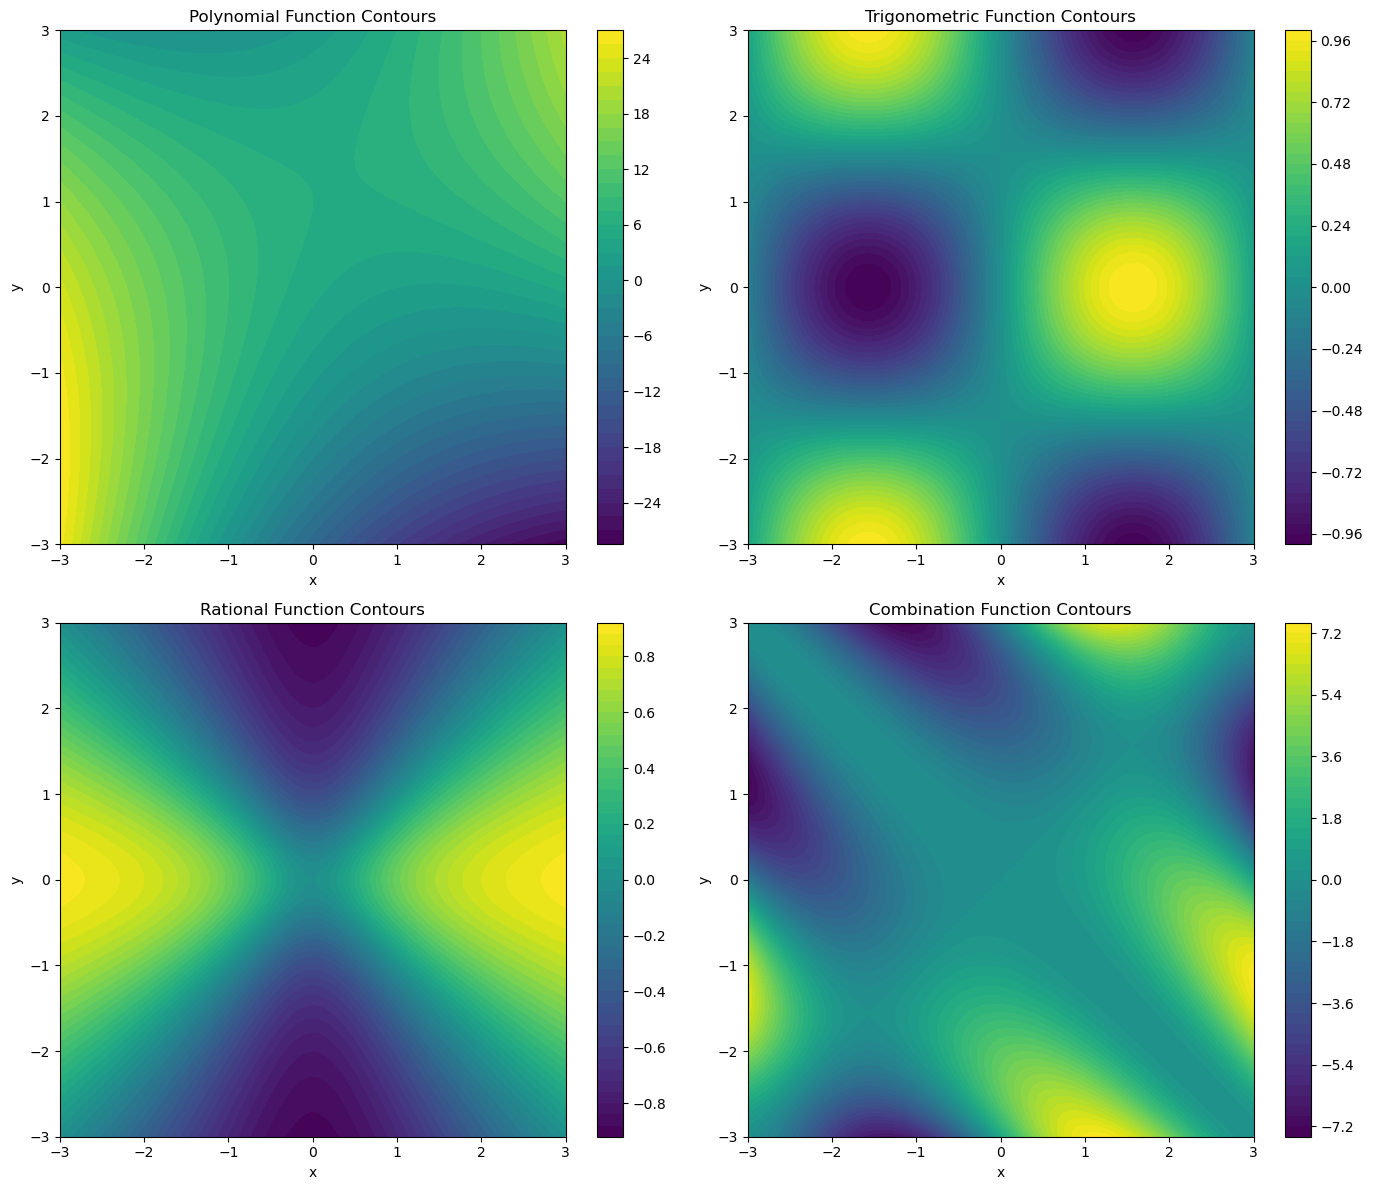

In [40]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# bivariate functions
def f(X, Y):
    return X**2 - Y**2 + 2*X*Y - 3*X + 2*Y + 5
def g(X, Y):
    return np.sin(X) * np.cos(Y)
def h(X, Y):
    return (X**2 - Y**2) / (X**2 + Y**2 + 1)
def k(X, Y):
    return (X**2 - Y**2) * np.sin(X + Y)

f_y = f(X, Y)
g_y = g(X, Y)
h_y = h(X, Y)
k_y = k(X, Y)

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

cp1 = axs[0, 0].contourf(X, Y, f_y, levels=50, cmap='viridis')
fig.colorbar(cp1, ax=axs[0, 0])
axs[0, 0].set_title('Polynomial Function Contours')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

cp2 = axs[0, 1].contourf(X, Y, g_y, levels=50, cmap='viridis')
fig.colorbar(cp2, ax=axs[0, 1])
axs[0, 1].set_title('Trigonometric Function Contours')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')

cp3 = axs[1, 0].contourf(X, Y, h_y, levels=50, cmap='viridis')
fig.colorbar(cp3, ax=axs[1, 0])
axs[1, 0].set_title('Rational Function Contours')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

cp4 = axs[1, 1].contourf(X, Y, k_y, levels=50, cmap='viridis')
fig.colorbar(cp4, ax=axs[1, 1])
axs[1, 1].set_title('Combination Function Contours')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')

plt.tight_layout()
plt.show()


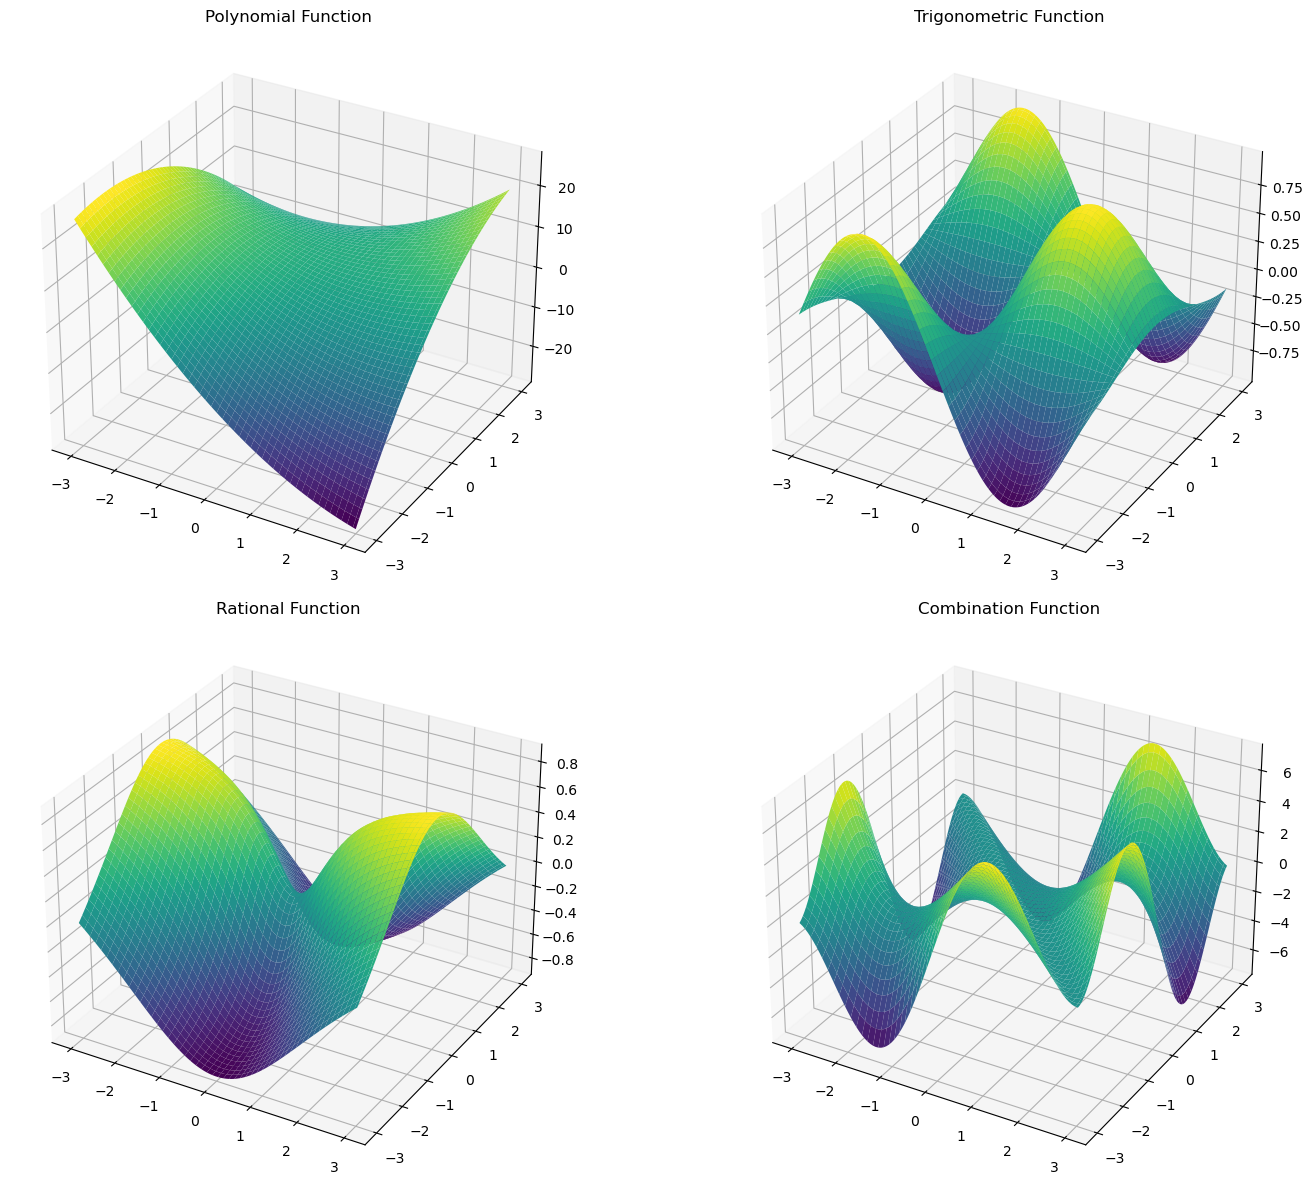

In [41]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X, Y, f_y, cmap='viridis')
ax1.set_title('Polynomial Function')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X, Y, g_y, cmap='viridis')
ax2.set_title('Trigonometric Function')

ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X, Y, h_y, cmap='viridis')
ax3.set_title('Rational Function')

ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X, Y, k_y, cmap='viridis')
ax4.set_title('Combination Function')

plt.tight_layout()
plt.show()

In [42]:
def gradient_descent_vec(fn, initial_point, learning_rate, n_iterations, threshold=1e10):
    x_path = [initial_point]
    for _ in range(n_iterations):
        current_point = x_path[-1]
        x, y = current_point
        gradient_val = gradient(fn, x, y)
        next_point = current_point - learning_rate * np.array(gradient_val)
        if np.linalg.norm(next_point - current_point) > threshold:
            break
        x_path.append(next_point)
    return np.array(x_path)

def gradient(fn, x, y):
    g = nd.Gradient(lambda v: fn(v[0], v[1]))
    return g([x, y])

learning_rates = [0.01, 0.05, 0.1]
initial_point = np.array([-1.0, 2.0])
funcs = [f, g, h, k]

paths = {}
for gamma in learning_rates:
    paths[gamma] = {}
    for func in funcs:
        paths[gamma][func.__name__] = gradient_descent_vec(func, initial_point, gamma, 1000)[-1]

In [43]:
paths

{0.01: {'f': array([-1.36396001e+11,  3.29288229e+11]),
  'g': array([-1.57068486e+00,  1.86588231e-04]),
  'h': array([-0.01001635,  3.03004473]),
  'k': array([-18.62778266,  20.65654049])},
 0.05: {'f': array([-2.82710435e+10,  6.82523143e+10]),
  'g': array([-1.57079633e+00,  1.84163302e-14]),
  'h': array([-3.20280097e-07,  4.36718447e+00]),
  'k': array([-7.79654443, 11.25945786])},
 0.1: {'f': array([-1.39416924e+10,  3.36582220e+10]),
  'g': array([-1.57079633e+00,  1.85298130e-14]),
  'h': array([-7.76176525e-11,  5.20128933e+00]),
  'k': array([2695285.17768193, 3175894.35617128])}}

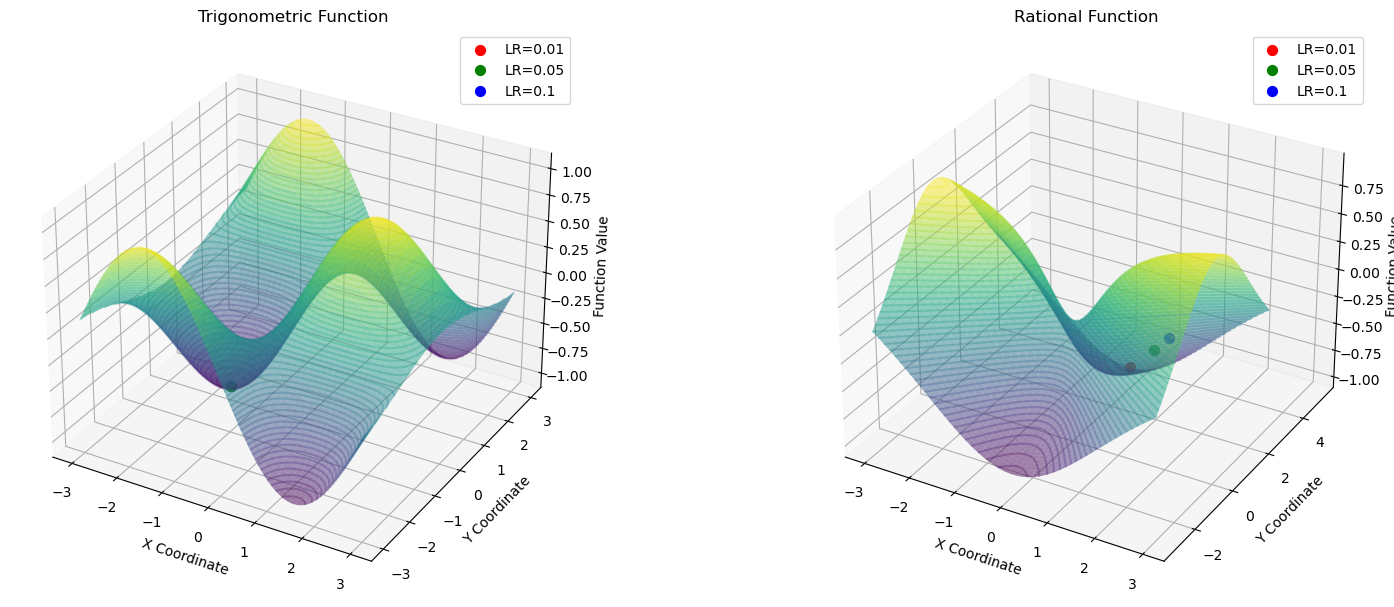

In [45]:
fig = plt.figure(figsize=(16, 12))

titles = ['Trigonometric Function', 'Rational Function']
surface_data = [g_y, h_y]
functions = [g, h]

colors = {0.01: 'red', 0.05: 'green', 0.1: 'blue'}

for i, (func, data, title) in enumerate(zip(functions, surface_data, titles)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot_surface(X, Y, data, cmap='viridis', alpha=0.5)
    ax.contour3D(X, Y, data, 50, cmap='viridis', alpha=0.3)
    
    for lr in learning_rates:
        x_point, y_point = paths[lr][func.__name__]
        z_point = func(x_point, y_point)
        ax.scatter(x_point, y_point, z_point, color=colors[lr], s=50, label=f'LR={lr}')

    ax.set_title(title)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Function Value')
    ax.legend()

plt.tight_layout()
plt.show()


In [49]:
def gradient_descent_with_momentum(fn, initial_x, learning_rate, n_iterations, beta=0.9, threshold=1e10):
    x_path = [initial_x]
    velocity = 0
    for _ in range(n_iterations):
        current_point = x_path[-1]
        x, y = current_point
        gradient_value = gradient(fn, x, y)
        velocity = beta * velocity + (1 - beta) * gradient_value
        next_x = current_point - learning_rate * velocity
        if np.linalg.norm(next_x - current_point) > threshold:
            break
        x_path.append(next_x)
    return x_path

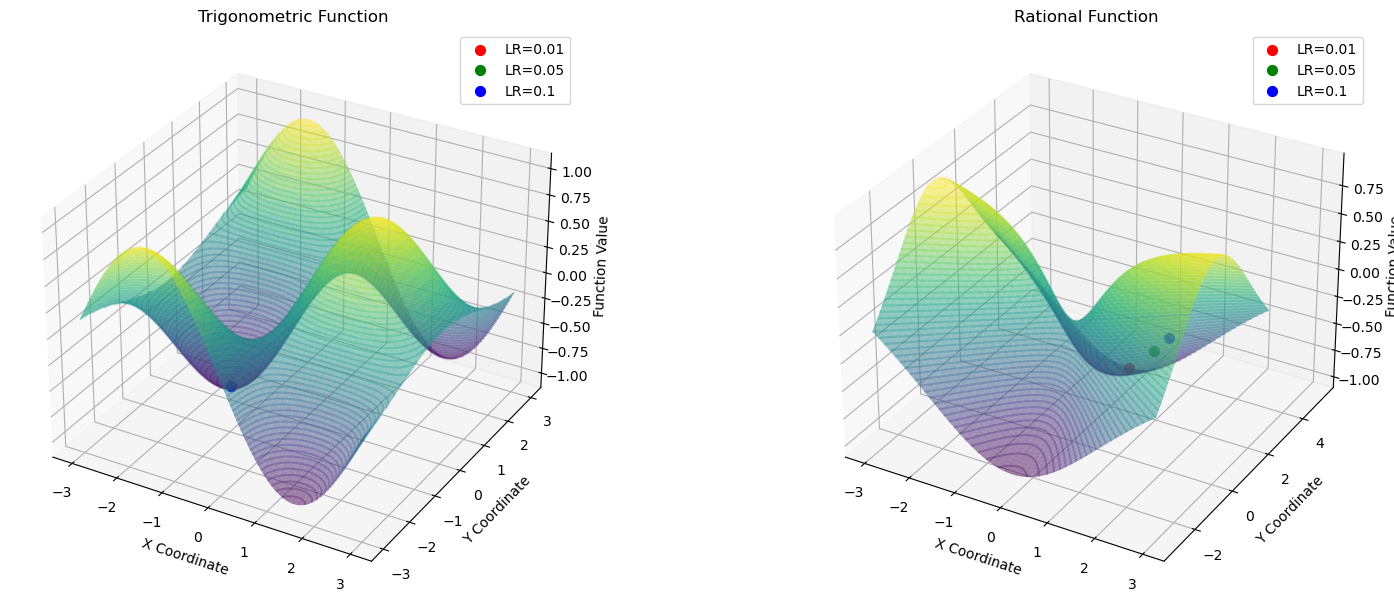

In [50]:
fig = plt.figure(figsize=(16, 12))

titles = ['Trigonometric Function', 'Rational Function']
surface_data = [g_y, h_y]
functions = [g, h]

colors = {0.01: 'red', 0.05: 'green', 0.1: 'blue'}

for i, (func, data, title) in enumerate(zip(functions, surface_data, titles)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot_surface(X, Y, data, cmap='viridis', alpha=0.5)
    ax.contour3D(X, Y, data, 50, cmap='viridis', alpha=0.3)
    
    for lr in learning_rates:
        path = gradient_descent_with_momentum(func, initial_point, lr, 1000)[-1]
        x_point, y_point = path
        z_point = func(x_point, y_point)
        ax.scatter(x_point, y_point, z_point, color=colors[lr], s=50, label=f'LR={lr}')

    ax.set_title(title)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Function Value')
    ax.legend()

plt.tight_layout()
plt.show()


In [54]:
def quadratic_function(x):
    return np.sum(x**2)

def gradient_quadratic(x):
    return 2 * x

def gradient_descent_generalized(fn, initial_point, learning_rate, n_iterations, threshold=1e-6):
    x = np.array(initial_point)
    x_path = [x.copy()]
    for _ in range(n_iterations):
        gradient = gradient_quadratic(x)
        x -= learning_rate * gradient
        x_path.append(x.copy())
        if np.linalg.norm(gradient) < threshold:
            break
    return np.array(x_path)

In [55]:
learning_rate = 0.1
n_iterations = 1000

dimensions = [3, 5, 50]
initial_points = {dim: np.random.rand(dim) for dim in dimensions}  # random initial points
results = {}

for dim in dimensions:
    results[dim] = gradient_descent_generalized(f, initial_points[dim], learning_rate, n_iterations)

final_positions = {dim: results[dim][-1] for dim in dimensions}
final_positions


{3: array([2.84074866e-07, 1.20194963e-07, 2.14312825e-07]),
 5: array([9.27812361e-09, 1.73981482e-07, 2.18759003e-07, 2.10236564e-07,
        2.09065613e-08]),
 50: array([7.83795462e-08, 4.97979746e-08, 4.62655743e-08, 7.22590467e-08,
        1.73830204e-08, 2.68207250e-08, 6.62006920e-08, 1.74118383e-08,
        4.61439873e-08, 2.94154652e-08, 3.88829950e-08, 3.21915981e-09,
        7.43346061e-08, 1.89914582e-08, 3.00852411e-08, 3.71875079e-08,
        5.42746913e-08, 6.98198537e-08, 1.36378153e-08, 7.95128258e-08,
        1.40235546e-08, 7.82171094e-08, 2.65510974e-09, 6.34009753e-08,
        5.74338035e-08, 2.50714029e-08, 3.10930505e-08, 2.90398184e-08,
        6.07491346e-09, 1.16298025e-08, 6.84738372e-08, 5.00054968e-08,
        2.24368977e-08, 4.97074104e-08, 4.34584389e-08, 1.97695211e-08,
        2.04285140e-09, 2.74672845e-08, 8.00549340e-08, 5.14667364e-08,
        6.00151004e-08, 9.43241565e-09, 3.25129932e-08, 6.54975459e-08,
        6.62945998e-08, 7.34153405e-08, 7.